NEED TO ADDRESS SKI

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import gt_apps as gt
import os
import sys
import re
import mkLightCurve
import glob
from make4FGLxml import *

This is make4FGLxml version 01r05.
The default diffuse model files and names are for pass 8 and 4FGL and assume you have v11r5p3 of the Fermi Science Tools or higher.


In [ ]:
os.chdir("/home/b7009348/projects/fermi-data/XSS_J12270_Data")

model_name = '4FGL J1228.0-4853'
name = 'J12270'            #define parameters specific to source
xcoord = 186.995
ycoord = -48.8952
binsz = 4000000 #size of bins wanted
start = 239557417 #start of fermi mission
end = 607305605 #final time for data downloaded
poolsize = 15


mkLightCurve.generateflux(poolsize,name,model_name,xcoord,ycoord,start,end,binsz)

Bin 273557417 has been calculated
Bin 337557417 has been calculated
Bin 289557417 has been calculated
Bin 241557417 has been calculated
Bin 313557417 has been calculated
Bin 257557417 has been calculated
Bin 353557417 has been calculated
Bin 297557417 has been calculated
Bin 329557417 has been calculated
Bin 345557417 has been calculated
Bin 305557417 has been calculated
Bin 321557417 has been calculated
Bin 277557417 has been calculated
Bin 317557417 has been calculated
Bin 341557417 has been calculated
Bin 293557417 has been calculated
Bin 249557417 has been calculated
Bin 261557417 has been calculated
Bin 357557417 has been calculated
Bin 349557417 has been calculated
Bin 245557417 has been calculated
Bin 301557417 has been calculated
Bin 309557417 has been calculated
Bin 333557417 has been calculated
Bin 325557417 has been calculated
Bin 369557417 has been calculated
Bin 377557417 has been calculated
Bin 253557417 has been calculated
Bin 401557417 has been calculated
Bin 409557417 

In [ ]:
os.chdir("/home/b7009348/projects/fermi-data/XSS_J12270_Data")

#!ls *_PH* > photons.txt

def generatemodel(name,templateDir):
    
    gt.filter['evclass'] = 128
    gt.filter['evtype'] = 3
    gt.filter['rad'] = 20
    gt.filter['zmax'] = 90
    gt.filter['emin'] = 100
    gt.filter['emax'] = 500000
    gt.filter['infile'] = '@photons.txt'
    gt.filter['outfile'] = name+'_allphotons_filtered.fits'
    gt.filter.run()
    
    gt.maketime['scfile'] = 'spacecraft.fits'
    gt.maketime['filter'] = '(DATA_QUAL>0)&&(LAT_CONFIG==1)'
    gt.maketime['roicut'] = 'no'
    gt.maketime['evfile'] = name+'_allphotons_filtered.fits'
    gt.maketime['outfile'] = name+'_allphotons_gti.fits'
    gt.maketime.run()


    mymodel = srcList('gll_psc_v21.xml',name+'_allphotons_gti.fits',name+'_model.xml')
    mymodel.makeModel('gll_iem_v07.fits','gll_iem_v07','iso_P8R3_SOURCE_V2_v1.txt','iso_P8R3_SOURCE_V2_v1',normsOnly=True,radLim=5,
                 extDir=templateDir)

    with open(name+'_model_clean.xml', 'wt') as f:
        f.write(re.sub(r'\$\(LATEXTDIR\)/', 
                       '', 
                       open(name+'_model.xml').read()))

    return;

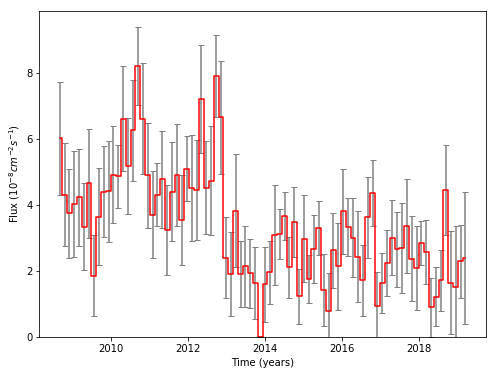

In [2]:
os.chdir("/home/b7009348/projects/fermi-data/XSS_J12270_Data")
name = 'J12270'
mkLightCurve.plotcurve(name,4000000)

In [7]:
os.chdir("/home/b7009348/projects/fermi-data/XSS_J12270_Data")

name = 'J12270'
tmid = '576557417'
binsz = 2000000

mkLightCurve.goodtimeint(name,tmid,binsz)

time -p gtmktime scfile=spacecraft.fits sctable="SC_DATA" filter="(DATA_QUAL>0)&&(LAT_CONFIG==1)" roicut=no evfile=J12270_filtered-576557417-2000000.fits evtable="EVENTS" outfile="J12270_gti-576557417-2000000.fits" apply_filter=yes overwrite=no header_obstimes=yes tstart=0.0 tstop=0.0 gtifile="default" chatter=2 clobber=yes debug=no gui=no mode="ql"


real 21.47
user 12.79
sys 3.31


In [8]:
mkLightCurve.livetimecube(name,tmid,binsz)

time -p gtltcube evfile="J12270_gti-576557417-2000000.fits" evtable="EVENTS" scfile=spacecraft.fits sctable="SC_DATA" outfile=J12270_ltcube-576557417-2000000.fits dcostheta=0.025 binsz=1.0 phibins=0 tmin=0.0 tmax=0.0 file_version="1" zmin=0.0 zmax=90.0 chatter=2 clobber=yes debug=no gui=no mode="ql"


Caught St13runtime_error at the top level: No GTIs found in input event file(s).


RuntimeError: gtltcube execution failed

In [4]:
os.chdir("/home/b7009348/projects/fermi-data/XSS_J12270_Data")
mkLightCurve.select('J12270',581557417,579557417,583557417,4000000,chatter=2)

time -p gtselect infile=@photons.txt outfile=J12270_filtered-581557417-4000000.fits ra="INDEF" dec="INDEF" rad=20.0 tmin=579557417.0 tmax=583557417.0 emin=100.0 emax=500000.0 zmin=0.0 zmax=90.0 evclass=128 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"


KeyboardInterrupt: 